# Differential gene expression

This tutorial currently only serves as a demo for pertpy's differential gene expression interface.
We will improve it at a later point.

## Environment setup

Note that the differential gene expression interface requires the `de` extra of pertpy to be installed (`pip install pertpy[de]`).

In [3]:
import pertpy as pt
import anndata as ad

from pydeseq2.utils import load_example_data

## Test dataset

We will use an exampel dataset of raw counts from pydeseq2.
It features two conditions and two groups.

In [4]:
adata = ad.AnnData(
    X=load_example_data(
        modality="raw_counts",
        dataset="synthetic",
        debug=False,
    ), obs=load_example_data(
        modality="metadata",
        dataset="synthetic",
        debug=False,
    ))

In [7]:
adata.obs

,condition,group
sample1,A,X
sample2,A,Y
sample3,A,X
sample4,A,Y
sample5,A,X
...,...,...
sample96,B,Y
sample97,B,X
sample98,B,Y
sample99,B,X


## EdgeR

```{note}
The edger interface further requires edger to be installed (`BiocManager::install("edgeR")`).
```

In [11]:
edgr = pt.tl.EdgeR(adata, design="~condition")

In [12]:
edgr.fit()
res_df = edgr.test_contrasts(edgr.contrast("condition", "A", "B"))

In [15]:
res_df

,variable,log_fc,logCPM,F,p_value,adj_p_value,contrast
0,gene5,0.611398,16.654136,13.986147,0.000195,0.001045,None
1,gene4,-0.394220,18.425936,13.851649,0.000209,0.001045,None
2,gene2,0.558505,16.355941,9.817301,0.001780,0.005934,None
3,gene1,0.743778,15.051013,7.903042,0.005034,0.012584,None
4,gene3,-0.602710,14.517640,3.903612,0.048463,0.096925,None
5,gene8,-0.238475,17.181188,2.849581,0.091716,0.150658,None
6,gene10,0.387877,15.474891,2.625814,0.105460,0.150658,None
7,gene9,-0.220519,17.064470,2.284304,0.131011,0.163764,None
8,gene7,0.157135,16.726899,0.965785,0.325976,0.362196,None
9,gene6,0.028413,14.591889,0.009232,0.923473,0.923473,None


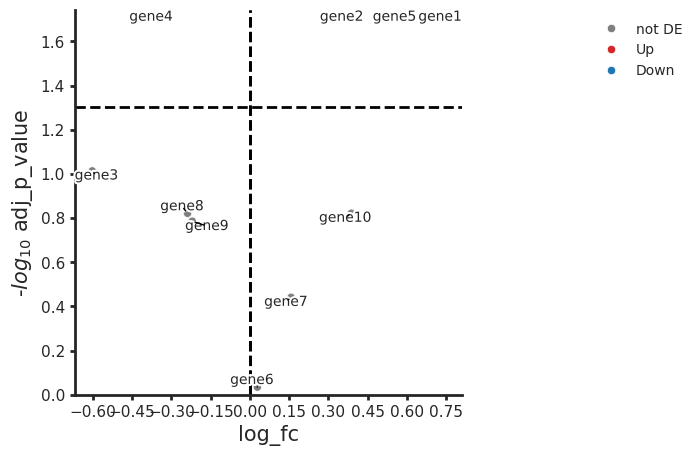

In [25]:
edgr.volcano(res_df, log2fc_thresh=0)

## Pydeseq2

In [26]:
pydeseq2 = pt.tl.PyDESeq2(adata=adata, design="~condition")
pydeseq2.fit()
res_df = pydeseq2.test_contrasts(["condition", "A", "B"])

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.06 seconds.

Fitting dispersion trend curve...
... done in 0.05 seconds.

Fitting MAP dispersions...
... done in 0.05 seconds.

Fitting LFCs...
... done in 0.04 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 0.04 seconds.



Log2 fold change & Wald test p-value: condition A vs B
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
gene1     8.541317       -0.632812  0.289101 -2.188898  0.028604  0.064150
gene2    21.281239       -0.538552  0.149963 -3.591236  0.000329  0.001646
gene3     5.010123        0.632830  0.295236  2.143476  0.032075  0.064150
gene4   100.517961        0.412102  0.118629  3.473868  0.000513  0.001710
gene5    27.142450       -0.582065  0.154706 -3.762409  0.000168  0.001646
gene6     5.413043       -0.001457  0.310311 -0.004696  0.996253  0.996253
gene7    28.294023       -0.134338  0.149945 -0.895917  0.370297  0.411441
gene8    40.358344        0.270656  0.136401  1.984261  0.047227  0.078711
gene9    37.166183        0.212715  0.133243  1.596437  0.110391  0.143147
gene10   11.589325       -0.386011  0.244588 -1.578207  0.114518  0.143147


In [27]:
res_df

,variable,baseMean,log_fc,lfcSE,stat,p_value,adj_p_value,contrast
0,gene5,27.142450,-0.582065,0.154706,-3.762409,0.000168,0.001646,None
1,gene2,21.281239,-0.538552,0.149963,-3.591236,0.000329,0.001646,None
2,gene4,100.517961,0.412102,0.118629,3.473868,0.000513,0.001710,None
3,gene1,8.541317,-0.632812,0.289101,-2.188898,0.028604,0.064150,None
4,gene3,5.010123,0.632830,0.295236,2.143476,0.032075,0.064150,None
5,gene8,40.358344,0.270656,0.136401,1.984261,0.047227,0.078711,None
6,gene9,37.166183,0.212715,0.133243,1.596437,0.110391,0.143147,None
7,gene10,11.589325,-0.386011,0.244588,-1.578207,0.114518,0.143147,None
8,gene7,28.294023,-0.134338,0.149945,-0.895917,0.370297,0.411441,None
9,gene6,5.413043,-0.001457,0.310311,-0.004696,0.996253,0.996253,None


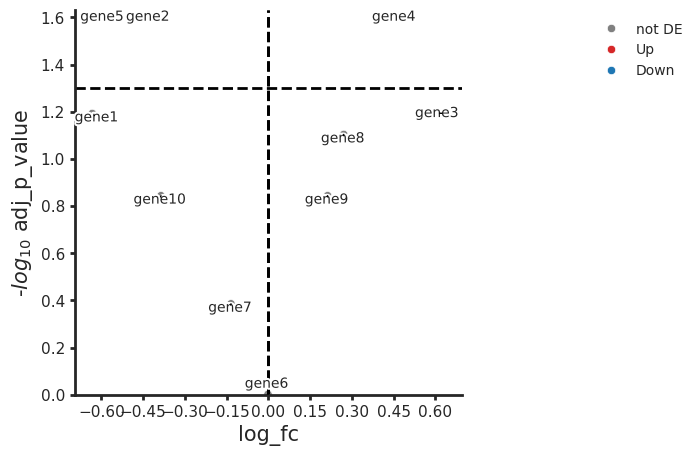

In [29]:
pydeseq2.volcano(res_df, log2fc_thresh=0)